In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from ReferenceElement import *
from dg_wave_with_coord_trans_new import *

In [28]:
x_p0 = 5
def x_p(t):
    return x_p0 + np.sin(t)
def xi_to_x(xi,a,b,t,x_p, xi_p,x_p0):
    x = a + (x_p(t)-a)/(xi_p-a)*(xi-a) + ((b-x_p(t))*(xi_p-a)-(x_p(t)-a)*(b-xi_p))/((xi_p-a)*(b-xi_p)*(b-a))*(xi-a)*(xi-xi_p)    
    return x

In [21]:
start = 0
end = 10
N = 5
x_p0 = 7.5
K = 4
h = (end-start)/K
xi_p =7.5
reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h
xi_int = get_x_elements(start,end,K, reference_interval)

In [22]:
t = np.pi/2
x_int = xi_to_x(xi_int,start,end,t,x_p,xi_p,x_p0)
x_int

array([[ 0.        ,  0.44571071,  1.32739843,  2.32570874,  3.12340435,
         3.5       ],
       [ 3.5       ,  3.86739582,  4.58914227,  5.39729823,  6.03505257,
         6.33333333],
       [ 6.33333333,  6.62241426,  7.18421944,  7.80222106,  8.28003413,
         8.5       ],
       [ 8.5       ,  8.71076604,  9.11262994,  9.54047722,  9.85834902,
        10.        ]])

In [23]:
y1 = np.ones_like(x_int)
y2 = np.zeros_like(xi_int)

Text(0.5, 1.0, 't = 1.571')

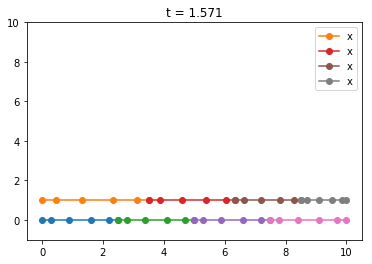

In [24]:
for i in range(len(xi_int)):
    plt.plot(xi_int[i],y2[i], marker = 'o')
    plt.plot(x_int[i],y1[i], marker = 'o', label = 'x')
plt.ylim(-1,10)
plt.legend()
plt.title('t = '+ str(np.round(t,3)))

In [25]:
t_int = np.linspace(0,2*np.pi,100)
direc = "coord2"
if os.path.isdir(direc):
    print('Directory'+direc+'already exists')
else:
    os.makedirs(direc)
images = []
for t in t_int:
    x_int = xi_to_x(xi_int,start,end,t,x_p,xi_p,x_p0)
    
    plt.figure(figsize=(11, 7), dpi=100)
    plt.grid()
    for i in range(len(xi_int)):
        plt.plot(xi_int[i],y2[i], marker = 'o')
        plt.plot(x_int[i],y1[i], marker = 'o', label = 'x')
    plt.ylim(-1,10)
    plt.legend()
    plt.title('t = '+ str(np.round(t,3)))
    plt.title(str(np.round(t,3)))
    name = direc+"/figure"+str(np.round(t,3))+'.png'
    plt.savefig(name)
    images.append(imageio.imread(name))
    plt.close()
gifName = direc+'/movie.gif'
imageio.mimsave(gifName,images)